<a href="https://colab.research.google.com/github/fellowship/platform-demos3/blob/master/OLTR/t_SNE_visualz%2COLTR_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction:
In this notebook we will compare the results of t-SNE visualization output between OLTR and fast.ai for celebrity faces datasets. 
###Methodology:
In order to asses and compare the performance of the OLTR research with fast.ai in classifying the images with long tail distribution, 14 labels from the celebrity faces dataset were selected. the head classes have an average of 150 images per class, the mid classes have an average of 70 images per class and the tail classes have an average of 25 images per class. the max number of images per clas is 263 and the min number of images per class is 10, therefore the distribution represents real open world cases where few-shot learning can help increase the performance of a model in classifying images in a long tail distribution setting.

The graphs in this notebook represent the seperation of classes in the testing set which is 10% of the main dataset of 1300 images with the same long tail distribution. 


In order to get the feature vectors of the images after training and validation, hooks were used to extract the pen-ultimate layer (layer before softmax and logits) from resnet152 in fast.ai.


for OLTR, it was more challenging to extract the dynamic meta embedding vectors since we modified the original code base of the project. It is important to note that we used resnet152 as the main model for training both approaches.



###OLTR (Large-Scale Long-Tailed Recognition in an Open World)
Open Long-Tailed Recognition
(OLTR) as learning from naturally distributed data
and optimizing the classification accuracy over a balanced
test set which include head, tail, and open classes.

OLTR must handle imbalanced classification, few-shot
learning, and open-set recognition in one integrated algorithm, whereas existing classification approaches focus
only on one aspect and deliver poorly over the entire class
spectrum.

In short OLTR is, ![OLTR](https://github.com/fellowship/platform-demos3/blob/master/OLTR/OLTR.PNG)

####Load required libraries for visualizations

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

###Loading the feature vectors (pen-ultimate layer) from fast.ai, the length of the flattened vectors are 512.

In [0]:
fastai = pd.read_pickle('fastai_features2.pkl')
fastai.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,labels
133,0.823519,-0.168282,-0.383366,-0.073292,0.045065,0.007660,0.888290,0.163555,-0.203010,-0.050585,0.686627,-0.208401,-0.007694,-0.034935,-0.385801,0.109811,-0.163459,0.541732,-0.143133,0.103985,-0.565012,0.043312,0.268216,-0.472515,-0.100709,0.631962,-0.108707,-0.720333,-0.139415,-0.056635,-0.366133,-0.334606,-0.659342,-0.043879,0.003356,-0.545127,-0.375583,-0.061630,-0.580821,0.075157,...,-0.066306,-0.021406,-0.197171,0.048924,-0.061164,-0.060736,-0.056794,-0.569187,-0.373049,0.775799,0.787184,-0.542374,-0.397628,-0.268278,-0.612634,-0.469791,-0.520010,0.530603,-0.543192,1.179518,-0.063001,0.184654,-0.025171,0.074213,0.303146,-0.328347,-0.570712,-0.035465,-0.723892,-0.494326,0.752698,0.063322,-0.638067,-0.161841,-0.345313,0.114827,-0.154117,-0.135495,-0.358679,2
134,0.291367,-0.156454,0.964330,-0.073785,0.045662,0.002239,-0.034278,-0.493138,-0.203010,-0.050585,1.893510,-0.167608,0.143802,-0.034935,1.809693,-0.551320,-0.163459,1.722549,-0.491455,0.026831,-0.565012,0.011362,0.039619,-0.560387,-0.100709,-0.330038,-0.200097,-0.403120,0.051593,-0.190340,-0.366133,0.286725,-0.104473,-0.043879,0.810792,-0.545127,0.831281,-0.061630,0.704217,-0.025338,...,-0.170664,-0.108488,-0.421250,-0.115169,-0.085238,-0.060736,0.151296,-0.569187,1.159480,-0.394495,-0.600126,0.630681,0.151114,-0.255799,-0.612634,1.139137,0.923877,-0.153988,-0.543192,0.821201,0.472915,0.214689,-0.025171,-0.166973,-0.203070,-0.328347,0.472630,-0.059554,-0.723892,-0.494326,0.193720,0.197226,-0.638067,0.254071,-0.345313,-0.606140,-0.154117,0.132720,2.195871,0
135,-0.154131,0.313362,-0.383366,0.023543,0.031265,0.137948,-0.620032,0.931455,0.318829,0.207582,-0.603758,0.430689,-0.110672,-0.034935,-0.385801,0.165247,-0.027968,-0.608419,-0.131764,0.002522,0.420132,0.066370,-0.110968,-0.560387,0.306331,-0.330038,-0.200097,-0.720333,-0.139415,0.063957,0.487548,0.295922,-0.145305,-0.043879,-0.611064,0.211349,-0.375583,0.021497,-0.580821,-0.134931,...,-0.003448,-0.167056,-0.250948,0.146598,-0.085238,0.180409,-0.056794,1.523039,-0.373049,-0.394495,-0.600126,0.643917,-0.397628,0.730696,-0.612634,-0.253722,-0.449761,-0.085416,-0.385424,-0.649154,-0.111141,-0.154272,0.051405,0.149850,0.388594,0.121669,-0.570712,0.046307,0.925460,-0.494326,-0.649624,-0.238463,1.597864,-0.279854,0.366100,-0.606140,-0.144475,-0.425157,-0.434227,1
136,0.267108,-0.168282,0.328962,-0.073785,0.053524,-0.042220,-0.620032,0.383889,-0.203010,-0.050585,2.951603,-0.208401,0.504986,-0.034935,1.332362,0.550572,-0.073728,-0.608419,-0.491455,0.002522,-0.140529,-0.009741,0.094820,-0.560387,-0.100709,-0.208702,-0.126784,1.207944,-0.129734,0.353467,-0.366133,-0.334606,2.449482,-0.043879,0.786299,-0.545127,0.503050,0.035334,-0.580821,0.168447,...,-0.170664,-0.167056,-0.421250,-0.115169,-0.085238,-0.060736,-0.056794,-0.569187,0.451465,0.523199,-0.600126,-0.542374,-0.397628,-0.268278,-0.612634,1.802815,-0.520010,-0.153988,-0.543192,0.858392,0.386021,-0.038468,-0.025171,-0.166973,-0.179456,-0.328347,-0.570712,-0.059554,0.468238,1.517068,0.879261,0.086353,-0.638067,0.617632,-0.166013,0.402333,-0.154117,1.170985,-0.434227,4
137,0.281334,-0.168282,0.662895,-0.073785,0.031265,-0.042220,-0.620032,-0.493138,-0.203010,-0.050585,0.858796,-0.208401,-0.110672,0.058878,-0.350741,-0.607266,0.131714,-0.608419,-0.282481,0.002522,-0.565012,0.079521,0.145060,-0.191025,-0.100709,-0.330038,0.299344,-0.720333,0.548988,-0.190340,-0.366133,-0.334606,-0.367105,-0.043879,-0.611064,-0.545127,0.191455,-0.061630,0.931044,-0.134931,...,-0.025479,0.465290,-0.421250,0.026110,-0.085238,-0.060736,-0.030360,-0.361471,-0.062487,0.393525,-0.600126,-0.103801,-0.397628,-0.268278,-0.473394,-0.469791,2.308562,-0.153988,-0.543192,-0.630710,0.321140,0.379567,-0.025171,-0.092059,0.533254

###Loading the feature vectors from OLTR, the length of the flattened dynamic meta embedding vectors are 512.

In [0]:
oltr = pd.read_pickle('oltr_embeddings.pkl')
oltr.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,labels
133,0.0,0.0,0.0,0.0,-5.513280e-09,0.0,0.0,0.0,1.199154e-09,1.224793e-07,-7.177473e-08,0.0,0.0,-9.288414e-10,-0.000002,0.0,0.005926,0.0,0.0,0.0,0.0,0.0,0.0,1.342381e-09,-7.764195e-09,-0.000117,0.000062,-0.008919,0.0,0.0,0.0,0.0,7.612962e-11,-3.717915e-11,-3.730753e-08,0.0,0.000045,2.404331e-09,-2.847800e-10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.998460e-09,-0.000671,-4.227856e-10,0.0,0.0,0.0,0.0,-0.000090,-0.000370,-0.314767,2.926241e-10,9.993325e-11,0.0,0.0,0.0,0.000034,-0.815449,0.001144,0.207080,7.424100e-10,-3.735755e-07,1.830290e-11,-9.372738e-11,0.000352,-5.266008e-09,7.862909e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
134,0.0,0.0,0.0,0.0,-2.945819e-07,0.0,0.0,0.0,1.992641e-08,-2.278794e-06,-5.837819e-08,0.0,0.0,3.622641e-08,-0.000017,0.0,-0.004424,0.0,0.0,0.0,0.0,0.0,0.0,4.272752e-08,6.458423e-09,-0.000030,-0.000072,0.090449,0.0,0.0,0.0,0.0,2.117188e-09,2.587620e-07,2.292334e-08,0.0,-0.000174,7.580138e-07,-3.620767e-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.873533e-10,0.000711,-7.396044e-08,0.0,0.0,0.0,0.0,0.000297,0.000113,0.062640,-1.918910e-07,2.802912e-08,0.0,0.0,0.0,0.000015,-0.601380,-0.005662,-0.837271,1.683497e-07,1.463397e-06,1.756823e-08,1.127632e-08,-0.000118,1.725595e-07,1.259713e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
135,0.0,0.0,0.0,0.0,-5.142841e-07,0.0,0.0,0.0,2.920871e-08,-2.488822e-06,8.193555e-08,0.0,0.0,5.552130e-08,-0.000017,0.0,-0.004055,0.0,0.0,0.0,0.0,0.0,0.0,3.074994e-08,2.984062e-08,0.000012,-0.000066,0.039796,0.0,0.0,0.0,0.0,1.188031e-08,9.944093e-08,-5.565527e-07,0.0,-0.000147,1.233591e-06,-3.642254e-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-4.773417e-12,0.000598,-1.144873e-07,0.0,0.0,0.0,0.0,0.000401,0.000179,2.836901,-2.337159e-07,-2.985397e-09,0.0,0.0,0.0,0.000011,-0.684915,-0.005245,-1.041547,1.397428e-07,4.479210e-06,1.868256e-08,1.177791e-08,-0.000284,4.895999e-07,1.645085e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
136,0.0,0.0,0.0,0.0,1.922315e-12,0.0,0.0,0.0,-2.953172e-14,1.845723e-06,-6.118659e-11,0.0,0.0,4.990027e-13,0.000026,0.0,0.001195,0.0,0.0,0.0,0.0,0.0,0.0,5.238854e-13,8.402101e-12,0.000030,0.000228,0.144774,0.0,0.0,0.0,0.0,3.274750e-14,1.004612e-11,1.085442e-10,0.0,-0.000027,3.800762e-11,-3.428591e-13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.216119e-12,-0.000321,-1.318374e-11,0.0,0.0,0.0,0.0,-0.000453,-0.000119,-0.280743,-9.266755e-13,2.000333e-11,0.0,0.0,0.0,0.000046,-0.896121,-0.000426,-1.224479,-7.968607e-13,-9.234892e-10,-1.541441e-11,2.405085e-13,0.000031,-1.736132e-11,-8.881953e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
137,0.0,0.0,0.0,0.0,9.583865e-10,0.0,0.0,0.0,3.519210e-10,1.105394e-06,-1.269667e-08,0.0,0.0,6.078765e-10,0.000018,0.0,-0.000417,0.0,0.0,0.0,0.0,0.0,0.0,-4.116237e-11,-4.519220e-10,-0.000042,-0.000250,-0.053759,0.0,0.0,0.0,0.0,-1.467656e-10,-2.193337e-10,-2.182117e-10,0.0,-0.000040,7.233746e-10,7.195868e-11,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.119085e-10,-0.000309,-1.304255e-09,0.0,0.0,0.0,0.0,0.000050,-0.000084,-0.124811,-1.024928e-08,7.604075e-10,0.0,0.0,0.0,0.000053,-0.372672,-0.001827,-0.512456,-3.529291e-10,-8.578014e-08,-2.513134e-10,-8.764751e-11,0.000335,-5.025629e-10,4.775248e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


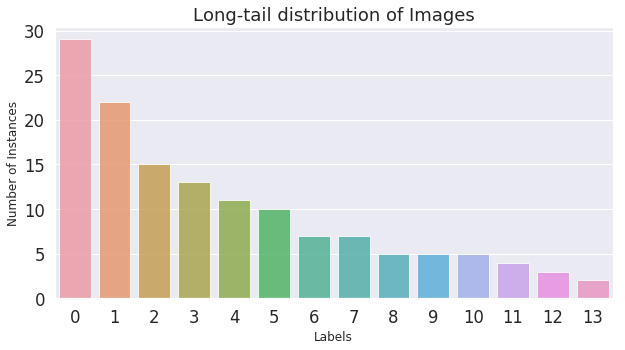

In [0]:
class_count = oltr['labels'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(class_count.index, class_count.values, alpha=0.8)
plt.title('Long-tail distribution of Images')
plt.ylabel('Number of Instances', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.show()

In [0]:
colummm = []
for mer in range(1,513):
    colummm.append(mer)
    


In [0]:
# main function for plotting the t-SNE visualization:

def tsne_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [0]:
X = oltr[colummm]
y = oltr['labels']

### As recommended by t-SNE documentation, we first applied PCA to project the dimension on the first 50 principle components and then we applied t-SNE

In [0]:


from sklearn.decomposition import PCA

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X)


In [0]:
from sklearn.manifold import TSNE

OLTR_pca_tsne = TSNE(random_state=42).fit_transform(pca_result_50)

#OLTR t-SNE plot

(<Figure size 576x576 with 1 Axes>,
 [Text(-3.3207505, 1.4439927, '0'),
  Text(7.5074453, -1.550559, '1'),
  Text(-5.1733103, 6.65022, '2'),
  Text(4.489361, -7.9134874, '3'),
  Text(-4.9163804, -4.4922895, '4'),
  Text(3.6091084, 1.9189415, '5'),
  Text(-8.299686, 1.8705152, '6'),
  Text(2.0218508, 6.7794156, '7'),
  Text(0.6914686, 0.19561806, '8'),
  Text(-1.6720645, -2.4439883, '9'),
  Text(4.227041, -4.2748857, '10'),
  Text(0.21534869, 3.3664246, '11'),
  Text(-3.8419616, 2.1326423, '12'),
  Text(5.4198346, 4.2837496, '13')])

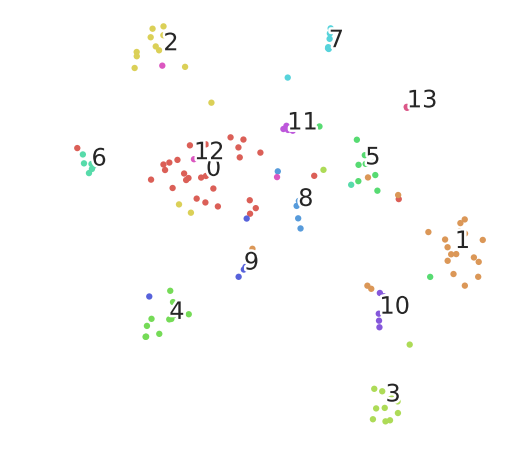

In [0]:
tsne_scatter(OLTR_pca_tsne, y)

In [0]:
columm = []
for me in range(1,513):
    columm.append(me)
    

In [0]:
X1 = fastai[columm]
y1 = fastai['labels']

In [0]:
pca_50a = PCA(n_components=50)
pca_result_50a = pca_50a.fit_transform(X1)


In [0]:
fastai_pca_tsnea = TSNE(random_state=42).fit_transform(pca_result_50a)

#fast.ai t-SNE plot

(<Figure size 576x576 with 1 Axes>,
 [Text(-5.6692176, 4.5621448, '0'),
  Text(8.92173, 0.57528365, '1'),
  Text(-1.1351126, 1.6014217, '2'),
  Text(8.079603, -5.439114, '3'),
  Text(1.6237518, 2.8065147, '4'),
  Text(3.6854203, -3.4279814, '5'),
  Text(-5.512124, -2.244401, '6'),
  Text(-1.8833572, -5.962571, '7'),
  Text(-0.7124921, 6.5503154, '8'),
  Text(1.7682304, -0.9693215, '9'),
  Text(10.883746, -4.1791725, '10'),
  Text(-1.4333562, 2.4753542, '11'),
  Text(-1.1631813, 2.446931, '12'),
  Text(5.8927917, -7.7618666, '13')])

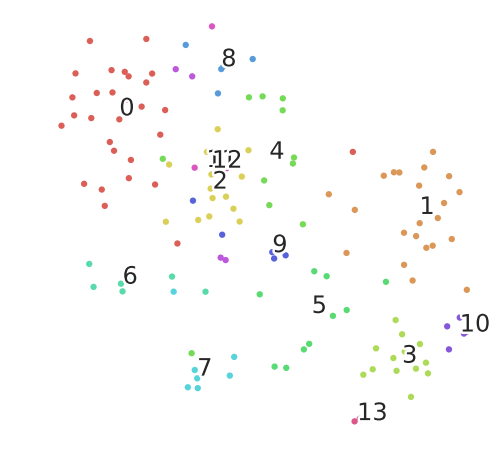

In [0]:
tsne_scatter(fastai_pca_tsnea, y1)

##Observations:
As depicted clearly by the scatter plots we can see that fast.ai by default is not able to separate the classes very well. there are some obvious overlap among classes: 11, 12, and 2. in addition, clusters are not very concentrated as compared to the results from OLTR's dynamic meta embedding vectors. it is important to note that the main objective of OLTR research is to imporove the performance of the model over a long tail distribution of dataset, which is more common in real world datasets, by applying few-shot learning. further analysis is needed to evaluate the results for OLTR in a normal distribution dataset.